In [82]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [17]:
# read the data
dataset = pd.read_csv('neat_crude_cut_properties.csv')

In [75]:
lr = LinearRegression()
lasso_1 = Lasso(alpha = 0)
lasso_2 = Lasso(alpha = 0.0000005)
lasso_3 = Lasso(alpha = 0.00001)

ridge_1 = Ridge(alpha = 0)
ridge_2 = Ridge(alpha = 0.5)
ridge_3 = Ridge(alpha = 1)

In [76]:
feature_columns = list (dataset.columns[14:])
output_columns = dataset.columns[3]
all_columns = feature_columns + [output_columns]

cleaned_dataset = dataset[all_columns].dropna()

In [77]:
X = cleaned_dataset[feature_columns]
y = cleaned_dataset[output_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [78]:
model_lr = lr.fit(X_train, y_train)
model_lasso_1 = lasso_1.fit(X_train, y_train)
model_lasso_2 = lasso_2.fit(X_train, y_train)
model_lasso_3 = lasso_3.fit(X_train, y_train)
model_ridge_1 = ridge_1.fit(X_train, y_train)
model_ridge_2 = ridge_2.fit(X_train, y_train)
model_ridge_3 = ridge_3.fit(X_train, y_train)

<ipython-input-78-2d0afb636635>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_lasso_1 = lasso_1.fit(X_train, y_train)
/Users/alonakonst/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/alonakonst/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.983867058467517, tolerance: 0.025757547272727273
  model = cd_fast.enet_coordinate_descent(
/Users/alonakonst/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21097706

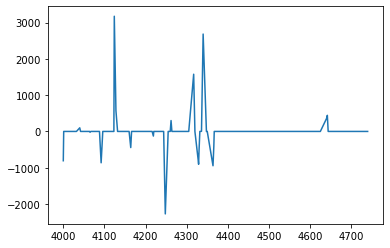

In [79]:
plt.plot(list(map(int, feature_columns)), model_lasso_2.coef_)

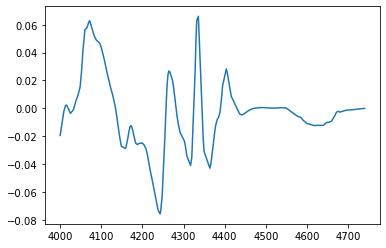

In [80]:
plt.plot(list(map(int, feature_columns)), model_ridge_3.coef_)

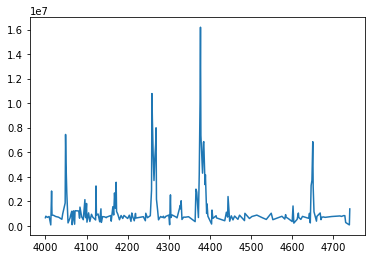

In [81]:
plt.plot(list(map(int, feature_columns)), abs(model_ridge_1.coef_))

In [86]:
rfe_object = RFE(ridge_1, n_features_to_select=30, step=5)

rfe_output = rfe_object.fit(X,y)

In [88]:
rfe_output.ranking_

array([14, 31, 30, 21, 14,  6, 25, 16,  3, 19, 12, 20,  6, 16, 30, 22,  1,
        1,  1,  1, 19, 32,  8,  4, 27, 11, 27, 22, 29,  9, 24,  5, 33, 12,
       31, 10, 23, 10, 27, 21,  5, 20, 27, 11, 24, 20, 29,  4, 23, 17, 31,
        1,  1, 16, 29, 20, 12, 25,  6, 26, 17,  7,  8,  3,  1,  1,  1,  1,
        3,  1,  1,  1, 32, 21, 12,  1, 31, 25,  6, 13, 21, 31,  3,  3,  7,
       23, 12, 22,  7, 24, 13, 25,  4, 24, 28,  9, 28, 16, 30, 11, 17,  1,
        1,  1, 18, 17, 18,  8, 18, 18, 15,  7, 30, 14, 17, 29,  4, 30,  9,
       15, 26, 19,  5, 23, 10, 21, 14, 25, 32,  1,  1,  1,  1,  1, 24, 18,
       32,  9, 13,  5, 28, 20, 15, 23, 32,  8, 33,  5, 22, 28, 10, 26, 26,
        2,  1,  1, 27, 15, 10,  1,  1, 22, 33, 11,  7, 16, 26,  1, 33, 28,
        1,  1,  1, 13,  6, 15, 11, 19,  8, 14,  4, 33, 19, 13, 29,  9])

In [100]:
    count = 0
    for i in rfe_output.ranking_:
        if i == 2:
            count+=1

In [101]:
count

1

In [107]:
    count = 0
    important_features = []
    for i in range(len(rfe_output.ranking_)):
        if rfe_output.ranking_[i] == 1:
            important_features.append(feature_columns[i])

In [108]:
important_features

['4651',
 '4650',
 '4648',
 '4646',
 '4444',
 '4443',
 '4388',
 '4385',
 '4384',
 '4382',
 '4377',
 '4376',
 '4374',
 '4366',
 '4269',
 '4268',
 '4266',
 '4172',
 '4170',
 '4168',
 '4166',
 '4164',
 '4097',
 '4096',
 '4083',
 '4081',
 '4061',
 '4052',
 '4050',
 '4049']

In [109]:
ridge_rfe = Ridge(alpha = 0)

In [111]:
X_train[important_features]

,4651,4650,4648,4646,4444,4443,4388,4385,4384,4382,...,4166,4164,4097,4096,4083,4081,4061,4052,4050,4049
1789,0.000293,0.000298,0.000306,0.000315,0.001360,0.001401,0.006286,0.006350,0.006373,0.006420,...,0.007505,0.007464,0.006775,0.006779,0.006963,0.007045,0.007374,0.006609,0.006408,0.006310
2674,0.000248,0.000252,0.000261,0.000269,0.001211,0.001255,0.006753,0.006796,0.006807,0.006827,...,0.007481,0.007466,0.006568,0.006563,0.006677,0.006748,0.007241,0.006665,0.006469,0.006372
2613,0.000385,0.000390,0.000401,0.000412,0.001496,0.001540,0.006737,0.006788,0.006802,0.006827,...,0.007452,0.007442,0.006403,0.006400,0.006562,0.006637,0.007091,0.006569,0.006397,0.006312
1123,0.000271,0.000275,0.000285,0.000294,0.001398,0.001441,0.006455,0.006511,0.006531,0.006572,...,0.007482,0.007449,0.006679,0.006681,0.006830,0.006906,0.007181,0.006488,0.006308,0.006220
2776,0.000286,0.000290,0.000298,0.000306,0.001313,0.001360,0.006631,0.006714,0.006737,0.006782,...,0.007595,0.007586,0.006397,0.006390,0.006456,0.006513,0.006884,0.006425,0.006274,0.006196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,0.000270,0.000274,0.000283,0.000292,0.001314,0.001355,0.006446,0.006503,0.006522,0.006560,...,0.007520,0.007492,0.006678,0.006678,0.006823,0.006896,0.007236,0.006560,0.006367,0.006273
616,0.000261,0.000265,0.000273,0.000280,0.001342,0.001383,0.006336,0.006400,0.006423,0.006469,...,0.007480,0.007441,0.006813,0.006816,0.006967,0.007048,0.007371,0.006602,0.006396,0.006298
25,0.000253,0.000258,0.000267,0.000277,0.001286,0.001329,0.006380,0.006456,0.006481,0.006530,...,0.007640,0.007610,0.006558,0.006554,0.006670,0.006734,0.007034,0.006411,0.006236,0.006149
1022,0.000237,0.000240,0.000247,0.000253,0.001290,0.001328,0.006310,0.006375,0.006398,0.006445,...,0.007556,0.007525,0.006751,0.006751,0.006862,0.006933,0.007184,0.006473,0.006290,0.006201


In [112]:
ridge_model_rfe = ridge_rfe.fit(X_train[important_features], y_train)

In [114]:
ridge_model_rfe

Ridge(alpha=0)

In [115]:
y_pred = ridge_model_rfe.predict(X_test[important_features])

In [116]:
y_pred

array([ 0.5417101 ,  0.24557476,  0.50403566,  0.84809927,  0.57925417,
        2.80986977,  0.91197235,  0.61404862,  0.58702633,  0.7041101 ,
        0.56201206,  0.92684812,  0.75212511,  0.6332613 ,  0.78824256,
        0.92366426,  1.02892577,  0.93465732,  1.90150683,  0.45016447,
        0.94768858,  1.05140432,  0.4688186 ,  4.70429715,  0.81185926,
        0.7595591 ,  0.41622414,  1.75829755,  0.46185226,  0.59523282,
        0.32352682,  1.05477733,  0.50168276,  1.11685777,  0.34579165,
        0.73814179,  3.09825718,  0.64193934,  0.6400096 ,  1.24712525,
        0.35336134,  0.55758338,  0.53427169,  0.9837963 ,  0.52723581,
        0.4014781 ,  0.81219043,  0.15801966,  0.47569284, -0.22345757,
        1.09029248,  0.02551268,  0.32477915,  0.64764675,  1.61379565,
        0.69932347,  1.08284064,  0.91568078,  1.06885553,  0.292126  ,
        1.04329239,  0.52526198,  0.224227  ,  0.67016876,  0.76683847,
        0.61302271,  0.57457854,  0.9766858 ,  0.4567324 ,  1.56

In [117]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.1932599451717471


In [118]:
#https://scikit-learn.org/stable/modules/feature_selection.html


In [119]:
# https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py